In [1]:
#in this file we will rewrite sustainable-mobility-index.R into python using the necessary libraries 
# the file does the exact same thing as the R file, but in python

import pandas as pd
import numpy as np
import plotly.express as px
import folium
import unicodedata

/Users/Kim/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# The goal of the script is to implement the methodology of the Sustainable Mobility Index in Lithuania. 
# It will create an index for each municipality at a national level and within each class.  
# The index will be based on the following categories: 
# - Environmental Impact
# - Incentives and Policies 
# - Cycling 
# - Public Transport 
# - Walking 
# - Cars: Fossil Fuels 
# - Cars: Electric and Alternative Fuels 
# - Use of Space 
# We apply a min-max normalization to each variable. 
# Then we calculate the weighted average of the variables for each category. 
# Finally, we calculate the Sustainable Mobility Index as a weighted sum of the categories. 

# write the code below in python 
lt_synthetic_df = pd.read_excel("lithuania_mobility_synthetic_60_classed_v2_for_software.xlsx")

In [3]:
# Rewrite the R code in python 
# In this code chunk, we will transform the data from wide to long format and assign the categories to each variable. 
# We will get the variable names after pivoting the data using pivot_longer and use those to assign the categories. 
# The categories are assigned based on the variable names to the following categories: 
# - Environmental Impact
# - Incentives and Policies
# - Cycling
# - Public Transport
# - Walking
# - Cars: Fossil Fuels
# - Cars: Electric and Alternative Fuels
# - Use of Space

# transform the data from wide to long format
lt_synthetic_long = pd.melt(lt_synthetic_df, id_vars=["county", "municipality", "class"], var_name="variable", value_name="value")
# create the sustainable mobility category column, assigning each variable to a category based on the R code below. 
lt_synthetic_long["sustainable_mobility_category"] = np.nan

lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("co2"), "sustainable_mobility_category"] = "Environmental Impact"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("noise"), "sustainable_mobility_category"] = "Environmental Impact"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("nox"), "sustainable_mobility_category"] = "Environmental Impact"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("pm10"), "sustainable_mobility_category"] = "Environmental Impact"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("pm25"), "sustainable_mobility_category"] = "Environmental Impact"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("electric"), "sustainable_mobility_category"] = "Cars: Electric and Alternative Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("public.transport"), "sustainable_mobility_category"] = "Public Transport"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("public.transit"), "sustainable_mobility_category"] = "Public Transport"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("bus.services"), "sustainable_mobility_category"] = "Public Transport"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("daily.departures"), "sustainable_mobility_category"] = "Public Transport"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("monthly.PT.ticket"), "sustainable_mobility_category"] = "Public Transport"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("fines"), "sustainable_mobility_category"] = "Incentives and Policies"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("investment"), "sustainable_mobility_category"] = "Incentives and Policies"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("cycling"), "sustainable_mobility_category"] = "Cycling"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("cyclist"), "sustainable_mobility_category"] = "Cycling"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("cycle"), "sustainable_mobility_category"] = "Cycling"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("bicycle"), "sustainable_mobility_category"] = "Cycling"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("bike_parking"), "sustainable_mobility_category"] = "Cycling"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("bicycle_parking"), "sustainable_mobility_category"] = "Cycling"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("EV"), "sustainable_mobility_category"] = "Cars: Electric and Alternative Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("number_of_persons_fatally_or_seriously_injured_per_population"), "sustainable_mobility_category"] = "Cycling"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("bike"), "sustainable_mobility_category"] = "Cycling"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("zero_car"), "sustainable_mobility_category"] = "Cars: Fossil Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("taxi"), "sustainable_mobility_category"] = "Cars: Fossil Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("cars_by_type"), "sustainable_mobility_category"] = "Cars: Electric and Alternative Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("ev"), "sustainable_mobility_category"] = "Cars: Electric and Alternative Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("fossil_fuel_car"), "sustainable_mobility_category"] = "Cars: Fossil Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("by_car"), "sustainable_mobility_category"] = "Cars: Fossil Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("zone"), "sustainable_mobility_category"] = "Incentives and Policies"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("commitment"), "sustainable_mobility_category"] = "Incentives and Policies"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("walking"), "sustainable_mobility_category"] = "Walking"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("pt_stop"), "sustainable_mobility_category"] = "Public Transport"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("wait_time"), "sustainable_mobility_category"] = "Public Transport"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("space"), "sustainable_mobility_category"] = "Use of Space"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("traffic"), "sustainable_mobility_category"] = "Use of Space"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("allocated_to_parking"), "sustainable_mobility_category"] = "Use of Space"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("parked"), "sustainable_mobility_category"] = "Use of Space"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("street"), "sustainable_mobility_category"] = "Use of Space"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("sustainable_mobility_plan"), "sustainable_mobility_category"] = "Incentives and Policies"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("to_fine"), "sustainable_mobility_category"] = "Incentives and Policies"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("walk_more"), "sustainable_mobility_category"] = "Walking"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("pedestrian"), "sustainable_mobility_category"] = "Walking"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("hybrid"), "sustainable_mobility_category"] = "Cars: Electric and Alternative Fuels"
lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("distribution_of_area"), "sustainable_mobility_category"] = "Use of Space"

lt_synthetic_long['variable'] = lt_synthetic_long['variable'].str.lower()

/var/folders/wh/f3ld23jd09n5b_bsk2x3z8h40000gn/T/ipykernel_13278/4229902707.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Environmental Impact' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  lt_synthetic_long.loc[lt_synthetic_long["variable"].str.contains("co2"), "sustainable_mobility_category"] = "Environmental Impact"


In [4]:
# generate the unique list of variables and sustainable mobility categories together
list_of_vars = lt_synthetic_long[["variable", "sustainable_mobility_category"]].drop_duplicates()
# just return the rows where sustainable_mobility_category = NaN
list_of_vars[list_of_vars["sustainable_mobility_category"].isna()]

,variable,sustainable_mobility_category


In [5]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect display width
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

list_of_vars = list_of_vars.sort_values(by="sustainable_mobility_category")
list_of_vars

,variable,sustainable_mobility_category
3240,share_of_all_trips_to_work_or_school_by_ev,Cars: Electric and Alternative Fuels
3300,share_of_all_trips_to_work_or_school_by_hybrid_vehicle,Cars: Electric and Alternative Fuels
3960,number_of_electric_charging_points_andor_hydrogen_filling_stations,Cars: Electric and Alternative Fuels
3420,distance_traveled_by_ev_per_weekday_among_those_whose_main_mode_is_ev,Cars: Electric and Alternative Fuels
3900,share_of_new_registered_vehicles_that_are_ev,Cars: Electric and Alternative Fuels
3480,distance_traveled_by_hybrid_vehicle_per_weekday_among_those_whose_main_mode_is_hybrid_vehicle,Cars: Electric and Alternative Fuels
720,ev_incentivization_policies,Cars: Electric and Alternative Fuels
3840,electric_vehicle_market_share,Cars: Electric and Alternative Fuels
3660,numbershare_of_passenger_ev_cars,Cars: Electric and Alternative Fuels
3720,numbershare_of_passenger_hybrid_cars,Cars: Electric and Alternative Fuels


In [6]:
higher_is_better = pd.read_csv("list_of_vars.csv")

In [7]:
# join higher_is_better to lt_synthetic_long on variable
lt_synthetic_long_final = lt_synthetic_long.merge(higher_is_better, on="variable", how="left")
# here is the R code for the next step: 
# We will now apply the min_max_norm function to each variable in the lt_synthetic_long dataframe.
#lt_synthetic_long_minmax <- lt_synthetic_long_final %>% 
  #  group_by(variable, higher_is_better) %>%
  #  mutate(min_max_norm = if_else(higher_is_better, (value - min(value)) / (max(value) - min(value)), (max(value) - value) / (max(value) - min(value)))) %>%
  #  ungroup()
  
# rewrite in python, so that the output is a dataframe
# with a new column called min_max_norm that is grouped by variable and higher_is_better and then calculated using the min_max_norm 
# formula in the R code above. 
# First, let's create a proper min-max normalization function
# Make sure the flag really is there
assert 'higher_is_better' in lt_synthetic_long_final.columns

def min_max_normalize(sub_df):
    """Min–max scale one variable, respecting the direction of ‘better’."""
    is_higher_better = sub_df['higher_is_better'].iloc[0]

    vals = sub_df['value']
    rng  = vals.max() - vals.min()
    if rng == 0:                       # avoid division-by-zero
        return pd.Series(0, index=sub_df.index)

    if is_higher_better:
        return (vals - vals.min()) / rng
    else:
        return (vals.max() - vals) / rng

lt_synthetic_long_final['min_max_norm'] = (
    lt_synthetic_long_final
        .groupby(['variable', 'higher_is_better'], group_keys=False)   
        .apply(min_max_normalize)                                      
)

/var/folders/wh/f3ld23jd09n5b_bsk2x3z8h40000gn/T/ipykernel_13278/1897323360.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lt_synthetic_long_final


In [8]:
# now, we want to take the lt_synthetic_long_final dataframe and calculate the average of the min_max_norm values for each variable, 
# for each municipality. 
# Then, we want to calculate the Sustainable Mobility Index for each municipality. 
# The Sustainable Mobility Index will be the weighted sum of the average of the min-max normalized values for each category. 
# The weights are as follows: 
# - Environmental Impact: 0.05
# - Incentives and Policies: 0.05
# - Cycling: 0.2
# - Public Transport: 0.2
# - Walking: 0.2
# - Cars: Fossil Fuels: 0.2
lt_synthetic_long_mean = (
    lt_synthetic_long_final
        .groupby(['municipality', 'sustainable_mobility_category'])['min_max_norm']
        .mean()                         # still a Series here
        .reset_index(name='avg_norm')   # → DataFrame, new column = avg_norm
)
# now pivot from long to wide format where each sustainable_mobility_category is a column and the values are the avg_norm values
lt_synthetic_long_mean_wide = lt_synthetic_long_mean.pivot(index='municipality', columns='sustainable_mobility_category', values='avg_norm')
# now add a column called sustainable_mobility_index that is the weighted sum of the columns
lt_synthetic_long_mean_wide['sustainable_mobility_index'] = (
    lt_synthetic_long_mean_wide['Environmental Impact'] * 0.05 +
    lt_synthetic_long_mean_wide['Incentives and Policies'] * 0.05 +
    lt_synthetic_long_mean_wide['Cycling'] * 0.2 +
    lt_synthetic_long_mean_wide['Public Transport'] * 0.2 +
    lt_synthetic_long_mean_wide['Walking'] * 0.2 +
    lt_synthetic_long_mean_wide['Cars: Fossil Fuels'] * 0.2 +
    lt_synthetic_long_mean_wide['Cars: Electric and Alternative Fuels'] * 0.1 +
    lt_synthetic_long_mean_wide['Use of Space'] * 0.05
)
# now sort the dataframe by the sustainable_mobility_index column in descending order
lt_synthetic_long_mean_wide = lt_synthetic_long_mean_wide.sort_values(by='sustainable_mobility_index', ascending=False)

lt_synthetic_long_mean_wide

sustainable_mobility_category,Cars: Electric and Alternative Fuels,Cars: Fossil Fuels,Cycling,Environmental Impact,Incentives and Policies,Public Transport,Use of Space,Walking,sustainable_mobility_index
municipality,,,,,,,,,
Zarasų rajono savivaldybė,0.521721,0.571306,0.613603,0.437769,0.596948,0.689991,0.612163,0.506116,0.610719
Anykščių rajono savivaldybė,0.555122,0.656439,0.530526,0.659263,0.646132,0.480605,0.521780,0.591387,0.598662
Elektrėnų savivaldybė,0.436139,0.673293,0.589084,0.291629,0.425652,0.598462,0.476788,0.610206,0.597526
Švenčionių rajono savivaldybė,0.521350,0.533849,0.601170,0.489992,0.469743,0.485186,0.516593,0.701367,0.590265
Kretingos rajono savivaldybė,0.550433,0.711632,0.504970,0.661856,0.349054,0.496560,0.435321,0.580951,0.586177
Ignalinos rajono savivaldybė,0.483485,0.576965,0.654613,0.368949,0.452197,0.530394,0.425072,0.606126,0.584279
Šakių rajono savivaldybė,0.393789,0.629405,0.420784,0.610842,0.532039,0.568783,0.658577,0.638745,0.580995
Mažeikių rajono savivaldybė,0.647770,0.379387,0.487940,0.527883,0.571554,0.559158,0.576455,0.719698,0.577808
Jurbarko rajono savivaldybė,0.368056,0.596746,0.515467,0.602673,0.295828,0.592560,0.673698,0.590848,0.574540


In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


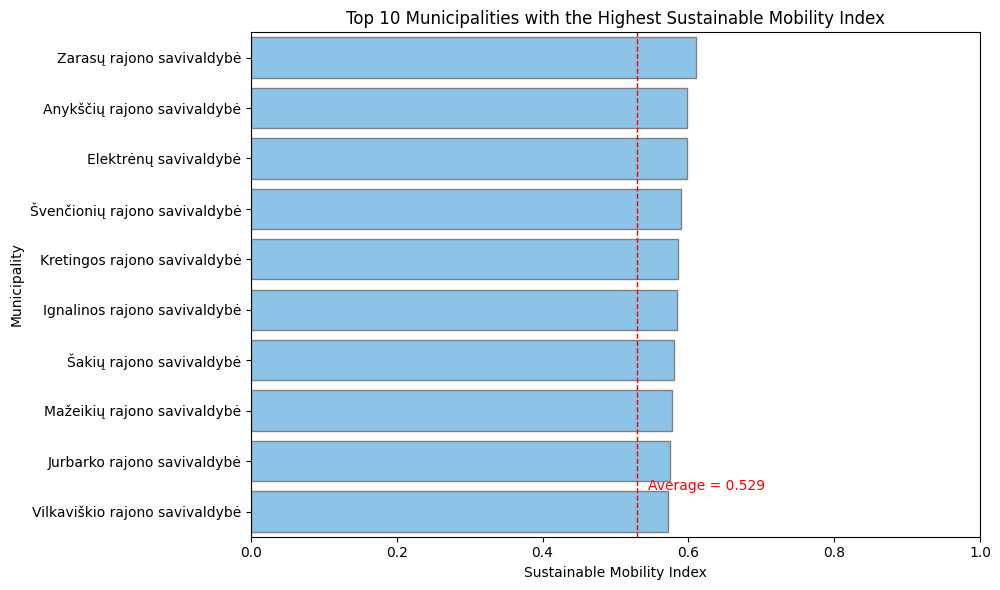

In [11]:
# Now, we will create a graph showing the top 10 municipalities with the highest Sustainable Mobility Index.  
# The graph is a bar chart. Let's use seaborn to create it. 
# The x-axis should be the Sustainable Mobility Index and the y-axis should be the Municipality. 
# The bars should be filled with a uniform light blue. 
# The bars should be outlined in grey. 
# The horizontal line should be red and the label should be the average Sustainable Mobility Index. 
# The graph should be titled "Top 10 Municipalities with the Highest Sustainable Mobility Index". 
# The x-axis should be labelled "Sustainable Mobility Index" and the y-axis should be labelled "Municipality". 
# The graph should be saved as a png file. 
# The file name should be "sustainable-mobility-index-top-10.png". 
# The graph should be saved in the same directory as the notebook. 
# ------------------------------------------------------------------
# build the data
# ------------------------------------------------------------------
top10 = (
    lt_synthetic_long_mean_wide
    .nlargest(10, 'sustainable_mobility_index')
    .reset_index()
)
overall_avg = lt_synthetic_long_mean_wide['sustainable_mobility_index'].mean()

# ------------------------------------------------------------------
# draw the figure
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=top10,
    y='municipality',
    x='sustainable_mobility_index',
    color='#7ec6f5',
    edgecolor='grey',
    ax=ax
)

ax.axvline(overall_avg, color='red', linestyle='--', linewidth=1)
ax.text(overall_avg + 0.015, len(top10) - 1.5,
        f'Average = {overall_avg:.3f}',
        color='red', va='center')

ax.set_title('Top 10 Municipalities with the Highest Sustainable Mobility Index')
ax.set_xlabel('Sustainable Mobility Index')
ax.set_ylabel('Municipality')

fig.tight_layout()
fig.savefig('sustainable-mobility-index-top-10.png',
            dpi=300, bbox_inches='tight', facecolor='white')
plt.xlim(0, 1)
plt.show()      

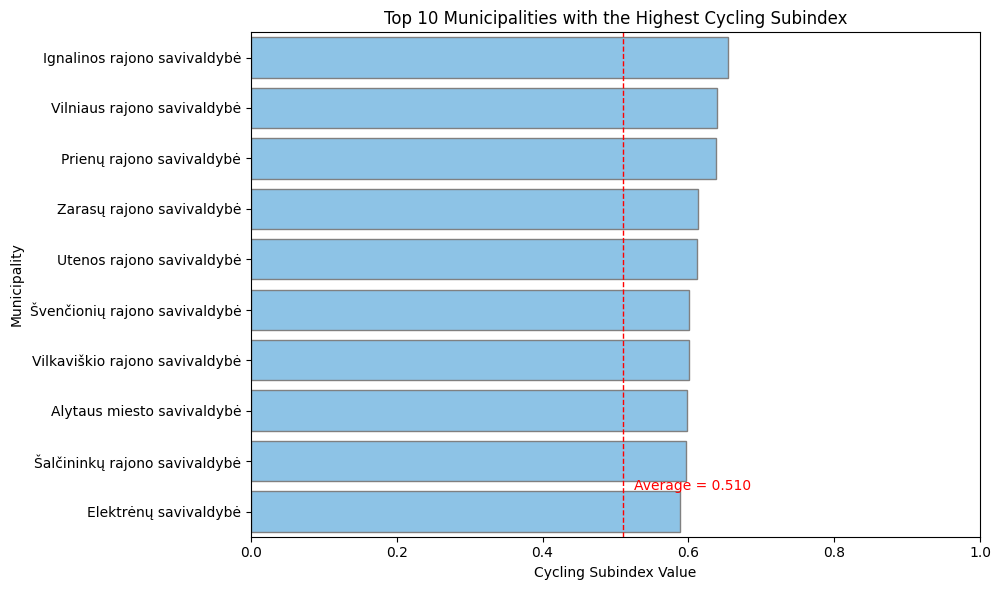

In [12]:
cycling_top10 = (
    lt_synthetic_long_mean_wide
    .nlargest(10, 'Cycling')
    .reset_index()
)
overall_avg = lt_synthetic_long_mean_wide['Cycling'].mean()

# ------------------------------------------------------------------
# draw the figure
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=cycling_top10,
    y='municipality',
    x='Cycling',
    color='#7ec6f5',
    edgecolor='grey',
    ax=ax
)

ax.axvline(overall_avg, color='red', linestyle='--', linewidth=1)
ax.text(overall_avg + 0.015, len(top10) - 1.5,
        f'Average = {overall_avg:.3f}',
        color='red', va='center')

ax.set_title('Top 10 Municipalities with the Highest Cycling Subindex')
ax.set_xlabel('Cycling Subindex Value')
ax.set_ylabel('Municipality')

fig.tight_layout()
fig.savefig('sustainable-cycling-sub-index-top-10.png',
            dpi=300, bbox_inches='tight', facecolor='white')
plt.xlim(0, 1)
plt.show()      

In [13]:
class_lt_synthetic_long_final = lt_synthetic_long_final
class_lt_synthetic_long_final['min_max_norm'] = (
    class_lt_synthetic_long_final
        .groupby(['class','sustainable_mobility_category', 'municipality', 'higher_is_better'], group_keys=False)   
        .apply(min_max_normalize)                                      
)

class_lt_synthetic_long_mean = (
    class_lt_synthetic_long_final
        .groupby(['class', 'sustainable_mobility_category', 'municipality'])['min_max_norm']
        .mean()                         # still a Series here
        .reset_index(name='avg_norm')   # → DataFrame, new column = avg_norm
)

# now pivot from long to wide format where each sustainable_mobility_category is a column and the values are the avg_norm values
class_lt_synthetic_long_mean_wide = (
    class_lt_synthetic_long_mean
        .pivot(index=['class', 'municipality'],
               columns='sustainable_mobility_category',
               values='avg_norm')
)

# Drop the column-axis name so the extra header disappears
class_lt_synthetic_long_mean_wide.columns.name = None          # ← removes the header line

# If you also want class & municipality as real columns
class_lt_synthetic_long_mean_wide = class_lt_synthetic_long_mean_wide.reset_index()

# now add a column called sustainable_mobility_index that is the weighted sum of the columns
class_lt_synthetic_long_mean_wide['sustainable_mobility_index'] = (
    class_lt_synthetic_long_mean_wide['Environmental Impact'] * 0.05 +
    class_lt_synthetic_long_mean_wide['Incentives and Policies'] * 0.05 +
    class_lt_synthetic_long_mean_wide['Cycling'] * 0.2 +
    class_lt_synthetic_long_mean_wide['Public Transport'] * 0.2 +
    class_lt_synthetic_long_mean_wide['Walking'] * 0.2 +
    class_lt_synthetic_long_mean_wide['Cars: Fossil Fuels'] * 0.2 +
    class_lt_synthetic_long_mean_wide['Cars: Electric and Alternative Fuels'] * 0.1 +
    class_lt_synthetic_long_mean_wide['Use of Space'] * 0.05
)
# now sort the dataframe by the sustainable_mobility_index column in descending order
class_lt_synthetic_long_mean_wide = class_lt_synthetic_long_mean_wide.sort_values(by='sustainable_mobility_index', ascending=False)

class_lt_synthetic_long_mean_wide.sort_values(by=['class','sustainable_mobility_index'], ascending=False)

/var/folders/wh/f3ld23jd09n5b_bsk2x3z8h40000gn/T/ipykernel_13278/2134594674.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_lt_synthetic_long_final


,class,municipality,Cars: Electric and Alternative Fuels,Cars: Fossil Fuels,Cycling,Environmental Impact,Incentives and Policies,Public Transport,Use of Space,Walking,sustainable_mobility_index
58,Suburban/Mid-sized,Šilalės rajono savivaldybė,0.339329,0.598542,0.300437,0.661659,0.523382,0.483608,0.507712,0.620658,0.519220
38,Suburban/Mid-sized,Kazlų Rūdos savivaldybė,0.312393,0.598919,0.258146,0.736343,0.464449,0.449883,0.600581,0.596992,0.502096
42,Suburban/Mid-sized,Mažeikių rajono savivaldybė,0.324532,0.599908,0.234724,0.756883,0.462429,0.451792,0.496510,0.625987,0.500727
53,Suburban/Mid-sized,Utenos rajono savivaldybė,0.376753,0.599379,0.315388,0.637129,0.387786,0.440281,0.552191,0.503498,0.488240
39,Suburban/Mid-sized,Klaipėdos rajono savivaldybė,0.349252,0.598593,0.277151,0.657165,0.338520,0.466107,0.452544,0.555642,0.486835
51,Suburban/Mid-sized,Trakų rajono savivaldybė,0.300867,0.598069,0.328243,0.607326,0.448272,0.368258,0.488431,0.599529,0.486108
35,Suburban/Mid-sized,Jonavos rajono savivaldybė,0.265453,0.590866,0.220602,0.739455,0.349269,0.465331,0.518947,0.584620,0.479213
40,Suburban/Mid-sized,Kėdainių rajono savivaldybė,0.257131,0.590203,0.307445,0.637234,0.403503,0.336648,0.519178,0.639734,0.478515
34,Suburban/Mid-sized,Elektrėnų savivaldybė,0.311135,0.598814,0.334210,0.695248,0.351742,0.479536,0.531408,0.425502,0.477646
56,Suburban/Mid-sized,Šalčininkų rajono savivaldybė,0.307875,0.598671,0.271157,0.730289,0.401516,0.436764,0.503339,0.506365,0.475136


In [14]:
overall_class_lt_synthetic_long_mean_wide = (
    class_lt_synthetic_long_mean_wide
    .groupby('class')        # operate on index level
    .mean(numeric_only=True)
    .reset_index()                 # make “class” a column for further use
)

overall_class_lt_synthetic_long_mean_wide['sustainable_mobility_index'] = (
    overall_class_lt_synthetic_long_mean_wide['Environmental Impact'] * 0.05 +
    overall_class_lt_synthetic_long_mean_wide['Incentives and Policies'] * 0.05 +
    overall_class_lt_synthetic_long_mean_wide['Cycling'] * 0.2 +
    overall_class_lt_synthetic_long_mean_wide['Public Transport'] * 0.2 +
    overall_class_lt_synthetic_long_mean_wide['Walking'] * 0.2 +
    overall_class_lt_synthetic_long_mean_wide['Cars: Fossil Fuels'] * 0.2 +
    overall_class_lt_synthetic_long_mean_wide['Cars: Electric and Alternative Fuels'] * 0.1 +
    overall_class_lt_synthetic_long_mean_wide['Use of Space'] * 0.05
)

overall_class_lt_synthetic_long_mean_wide.sort_values(by='sustainable_mobility_index', ascending=False)

,class,Cars: Electric and Alternative Fuels,Cars: Fossil Fuels,Cycling,Environmental Impact,Incentives and Policies,Public Transport,Use of Space,Walking,sustainable_mobility_index
2,Rural,0.280669,0.596683,0.288029,0.657232,0.450556,0.425895,0.488173,0.530624,0.476111
0,Metropolitan,0.323459,0.598525,0.272883,0.687609,0.492113,0.413797,0.482159,0.485501,0.469581
3,Suburban/Mid-sized,0.291658,0.597543,0.278337,0.674657,0.426931,0.421654,0.503379,0.495205,0.467962
1,Resort Town,0.298765,0.596556,0.230216,0.667559,0.407156,0.405815,0.525448,0.524286,0.461259


In [15]:
suburban_mid = class_lt_synthetic_long_mean_wide[class_lt_synthetic_long_mean_wide['class'] == 'Suburban/Mid-sized']
suburban_mid_top10 = suburban_mid.nlargest(10, 'sustainable_mobility_index')
suburban_mid_top10





,class,municipality,Cars: Electric and Alternative Fuels,Cars: Fossil Fuels,Cycling,Environmental Impact,Incentives and Policies,Public Transport,Use of Space,Walking,sustainable_mobility_index
58,Suburban/Mid-sized,Šilalės rajono savivaldybė,0.339329,0.598542,0.300437,0.661659,0.523382,0.483608,0.507712,0.620658,0.519220
38,Suburban/Mid-sized,Kazlų Rūdos savivaldybė,0.312393,0.598919,0.258146,0.736343,0.464449,0.449883,0.600581,0.596992,0.502096
42,Suburban/Mid-sized,Mažeikių rajono savivaldybė,0.324532,0.599908,0.234724,0.756883,0.462429,0.451792,0.496510,0.625987,0.500727
53,Suburban/Mid-sized,Utenos rajono savivaldybė,0.376753,0.599379,0.315388,0.637129,0.387786,0.440281,0.552191,0.503498,0.488240
39,Suburban/Mid-sized,Klaipėdos rajono savivaldybė,0.349252,0.598593,0.277151,0.657165,0.338520,0.466107,0.452544,0.555642,0.486835
51,Suburban/Mid-sized,Trakų rajono savivaldybė,0.300867,0.598069,0.328243,0.607326,0.448272,0.368258,0.488431,0.599529,0.486108
35,Suburban/Mid-sized,Jonavos rajono savivaldybė,0.265453,0.590866,0.220602,0.739455,0.349269,0.465331,0.518947,0.584620,0.479213
40,Suburban/Mid-sized,Kėdainių rajono savivaldybė,0.257131,0.590203,0.307445,0.637234,0.403503,0.336648,0.519178,0.639734,0.478515
34,Suburban/Mid-sized,Elektrėnų savivaldybė,0.311135,0.598814,0.334210,0.695248,0.351742,0.479536,0.531408,0.425502,0.477646
56,Suburban/Mid-sized,Šalčininkų rajono savivaldybė,0.307875,0.598671,0.271157,0.730289,0.401516,0.436764,0.503339,0.506365,0.475136


In [16]:
suburban_mid

,class,municipality,Cars: Electric and Alternative Fuels,Cars: Fossil Fuels,Cycling,Environmental Impact,Incentives and Policies,Public Transport,Use of Space,Walking,sustainable_mobility_index
58,Suburban/Mid-sized,Šilalės rajono savivaldybė,0.339329,0.598542,0.300437,0.661659,0.523382,0.483608,0.507712,0.620658,0.519220
38,Suburban/Mid-sized,Kazlų Rūdos savivaldybė,0.312393,0.598919,0.258146,0.736343,0.464449,0.449883,0.600581,0.596992,0.502096
42,Suburban/Mid-sized,Mažeikių rajono savivaldybė,0.324532,0.599908,0.234724,0.756883,0.462429,0.451792,0.496510,0.625987,0.500727
53,Suburban/Mid-sized,Utenos rajono savivaldybė,0.376753,0.599379,0.315388,0.637129,0.387786,0.440281,0.552191,0.503498,0.488240
39,Suburban/Mid-sized,Klaipėdos rajono savivaldybė,0.349252,0.598593,0.277151,0.657165,0.338520,0.466107,0.452544,0.555642,0.486835
51,Suburban/Mid-sized,Trakų rajono savivaldybė,0.300867,0.598069,0.328243,0.607326,0.448272,0.368258,0.488431,0.599529,0.486108
35,Suburban/Mid-sized,Jonavos rajono savivaldybė,0.265453,0.590866,0.220602,0.739455,0.349269,0.465331,0.518947,0.584620,0.479213
40,Suburban/Mid-sized,Kėdainių rajono savivaldybė,0.257131,0.590203,0.307445,0.637234,0.403503,0.336648,0.519178,0.639734,0.478515
34,Suburban/Mid-sized,Elektrėnų savivaldybė,0.311135,0.598814,0.334210,0.695248,0.351742,0.479536,0.531408,0.425502,0.477646
56,Suburban/Mid-sized,Šalčininkų rajono savivaldybė,0.307875,0.598671,0.271157,0.730289,0.401516,0.436764,0.503339,0.506365,0.475136


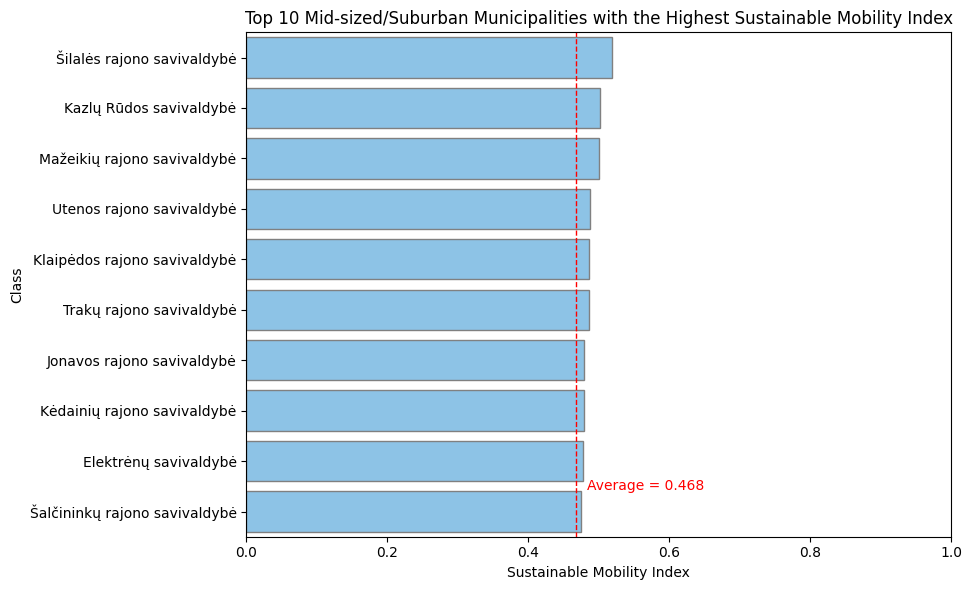

In [17]:

# ------------------------------------------------------------------
# draw the figure
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=suburban_mid_top10,
    y='municipality',
    x='sustainable_mobility_index',
    color='#7ec6f5',
    edgecolor='grey',
    ax=ax
)

midsize_avg = suburban_mid['sustainable_mobility_index'].mean()
ax.axvline(midsize_avg, color='red', linestyle='--', linewidth=1)
ax.text(midsize_avg + 0.015, len(suburban_mid_top10) - 1.5,
        f'Average = {midsize_avg:.3f}',
        color='red', va='center')

ax.set_title('Top 10 Mid-sized/Suburban Municipalities with the Highest Sustainable Mobility Index')
ax.set_xlabel('Sustainable Mobility Index')
ax.set_ylabel('Class')

fig.tight_layout()
fig.savefig('mid-sized-sustainable-mobility-index.png',
            dpi=300, bbox_inches='tight', facecolor='white')

plt.xlim(0, 1)
plt.show()   